In [1]:
import sys
import os.path
import requests
import json
from datetime import datetime 
import pandas as pd

In [2]:
cfm_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
rec_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

cfm_df.drop(columns=['Lat', 'Long'], inplace=True)
cfm_df = cfm_df.groupby('Country/Region').sum().transpose()
death_df.drop(columns=['Lat', 'Long'], inplace=True)
death_df = death_df.groupby('Country/Region').sum().transpose()
rec_df.drop(columns=['Lat', 'Long'], inplace=True)
rec_df = rec_df.groupby('Country/Region').sum().transpose()

world_total = {}
for item in cfm_df.index:
    #print(f'index: {index}, item: {item}')
    #world_total = cfm_df.loc[index, item].sum()
    #cfm_todate = cfm_df.loc[item].sum()
    #death_todate = death_df.loc[item].sum()
    #rec_todate = rec_df.loc[item].sum()
    cfm_df.loc[item, 'World Confirmed'] = cfm_df.loc[item].sum()
    death_df.loc[item, 'World Death'] = death_df.loc[item].sum()
    rec_df.loc[item, 'World Recovered'] = rec_df.loc[item].sum()
#cfm_todate, death_todate, rec_todate




In [3]:
rec_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,World Recovered
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39.0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/7/20,25903,3227,23667,839,544,76,103297,32008,11560,19690,...,1095,20059,12470,395,7210,8,907,6264,1345,11737927.0
8/8/20,25960,3268,24083,839,564,76,108242,32395,11874,19812,...,1112,21006,13356,395,7706,8,910,6431,1416,11939109.0
8/9/20,25960,3342,24506,839,567,76,108242,32520,11876,19923,...,1125,22042,13356,395,7945,8,913,6698,1437,12115825.0
8/10/20,26228,3379,24920,839,569,76,108242,32616,12144,20010,...,1146,22992,16930,399,8045,8,915,6802,1524,12280520.0


In [4]:
cfm_df['Malaysia']

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       3
1/26/20       4
           ... 
8/7/20     9063
8/8/20     9070
8/9/20     9083
8/10/20    9094
8/11/20    9103
Name: Malaysia, Length: 203, dtype: int64

In [5]:
# create dataframe by country
my_df = pd.DataFrame([cfm_df['Malaysia'], death_df['Malaysia'], rec_df['Malaysia']])
my_df = my_df.transpose()
my_df.columns = ['Total Cases', 'Total Deaths', 'Total Recovered']

In [6]:
# TODO: make this into methods ... active, daily cases, daily deaths, daily recovered, cases 1m pop, rates %
my_df['Total Active'] = my_df['Total Cases'] - my_df['Total Recovered'] - my_df['Total Deaths']

<AxesSubplot:>

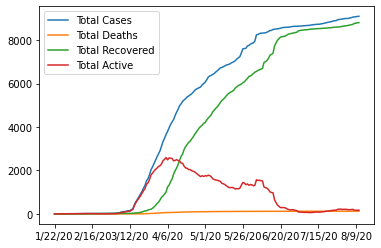

In [7]:
my_df.plot()